# A Pyomo version of *Limeade* 

*Limeade* also supports *Pyomo* as an alternative modeling language so that the users could use open-sourced solvers. Comparing to the *Gurobi* version, one only needs to modify two places:
- Specify *Pyomo* as the modeling language when initializing the model, e.g., 
    ```
    Mol = MIPMol(atoms, N_atoms, language="Pyomo")  
    ```
- Use `solve_pyomo` instead of `solve` function, and specify the solver and corresponding solver options when solving the model, e.g.,
    ```
    mols = Mol.solve_pyomo(NumSolutions, BatchSize, solver="cplex_direct", solver_options={"timelimit":600})
    ```

*Limeade* uses `pyomo.contrib.alternative_solutions` to generate feasible solutions. The users could alternatively extract the *Pyomo* model from *Limeade* and use their own ways to generate solutions.

The required Python libraries used in this notebook are as follows:
- `Limeade`: the package this notebook demonstrates. it can encode molecule space with given requirements into mathematical equations and generate feasible solutions quickly.
- `rdkit`: used to plot generated molecules.
- `pyomo`: the algebraic modeling language for Python, it is used to define the optimization model passed to the solver.

A solver compatible with *Pyomo* is also needed (*CPLEX* is used in this notebook).

From simplicity, we are not going to repeat those examples that are already shown in other notebooks. Instead, we give a tiny example and use both versions of *Limeade* to count all possible solutions.

## *Pyomo* version

100%|██████████| 1/1 [00:02<00:00,  2.99s/it]

45 molecules are generated after 3.0 seconds.
There are 8 molecules left after removing symmetric and invalid molecules.


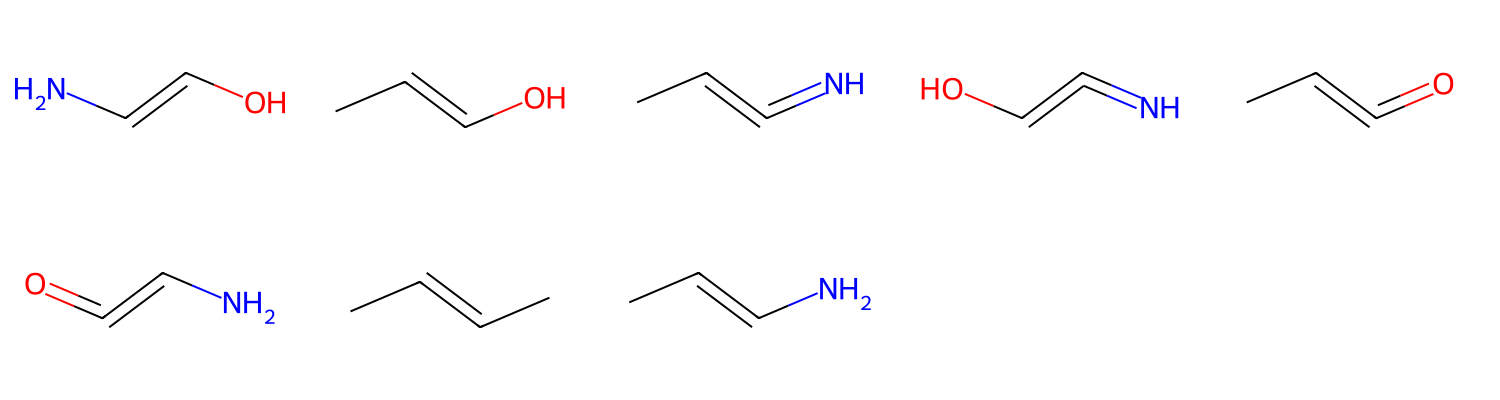

In [1]:
from limeade import MIPMol
from rdkit import Chem
# set the number of atoms and types of atoms
N = 4
Mol = MIPMol(atoms=["C", "N", "O"], N_atoms=N, language="Pyomo")
# set the bounds for the number of each type of atom (optional)
lb = [N // 2, None, None]
ub = [None, N // 4, N // 4]
Mol.bounds_atoms(lb, ub)
# set the bounds for number of double/triple bonds, and rings (optional)
Mol.bounds_double_bonds(None, N // 2)
Mol.bounds_triple_bonds(None, N // 2)
Mol.bounds_rings(None, 0)
# exclude several patterns
Mol.include_substructures(["C=C"])
Mol.exclude_substructures(["C=[CH2]"])
Mol.exclude_substructures(["[CH0X4]", "[CH1X4]"])

mols = Mol.solve_pyomo(NumSolutions=100, solver="cplex_direct", solver_options={"timelimit":600})
Chem.Draw.MolsToGridImage([mol for mol in mols], subImgSize=(300, 200), molsPerRow=5)

## *Gurobi* version
Using the *Gurobi* version gives the same solutions.

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-11


  0%|          | 0/1 [00:00<?, ?it/s]

Discarded solution information
Reset all parameters


100%|██████████| 1/1 [00:00<00:00, 55.55it/s]

45 molecules are generated after 0.02 seconds.
There are 8 molecules left after removing symmetric and invalid molecules.


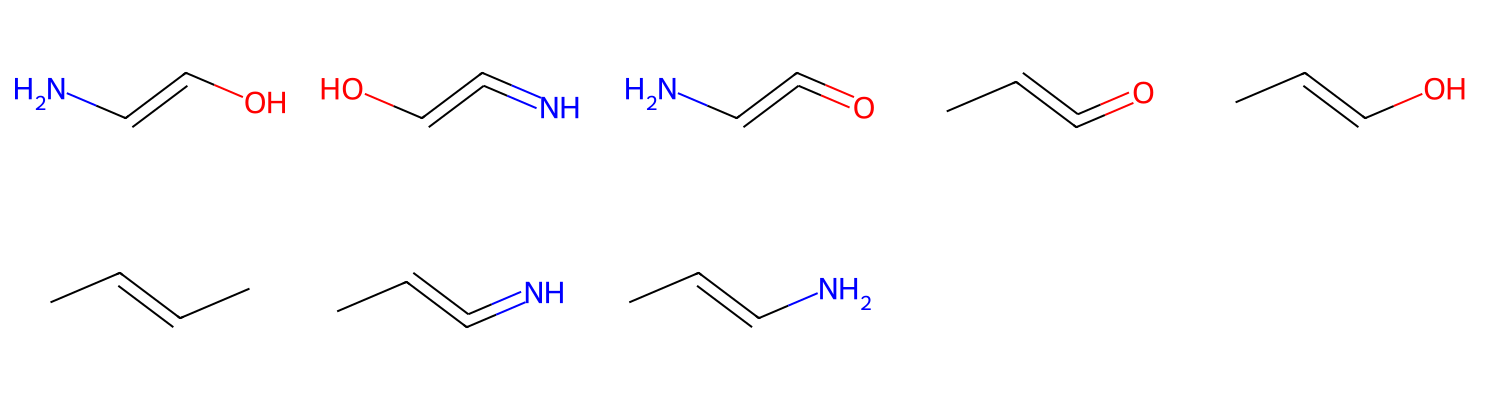

In [2]:
from Limeade import MIPMol
from rdkit import Chem
# set the number of atoms and types of atoms
N = 4
Mol = MIPMol(atoms=["C", "N", "O"], N_atoms=N)
# set the bounds for the number of each type of atom (optional)
lb = [N // 2, None, None]
ub = [None, N // 4, N // 4]
Mol.bounds_atoms(lb, ub)
# set the bounds for number of double/triple bonds, and rings (optional)
Mol.bounds_double_bonds(None, N // 2)
Mol.bounds_triple_bonds(None, N // 2)
Mol.bounds_rings(None, 0)
# exclude several patterns
Mol.include_substructures(["C=C"])
Mol.exclude_substructures(["C=[CH2]"])
Mol.exclude_substructures(["[CH0X4]", "[CH1X4]"])

mols = Mol.solve(NumSolutions=100)
Chem.Draw.MolsToGridImage([mol for mol in mols], subImgSize=(300, 200), molsPerRow=5)